# **Loading tools and dataset**

In [25]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

from ast import literal_eval

import numpy as np

In [26]:
arxiv_data=pd.read_csv('arxiv_data_210930-054931.csv')

In [27]:
arxiv_data.head()

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...


# **Data Cleaning and Preprocessing**

In [28]:
arxiv_data.shape

(56181, 3)

In [29]:
arxiv_data.isnull().sum()

terms        0
titles       0
abstracts    0
dtype: int64

In [30]:
arxiv_data

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...
...,...,...,...
56176,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...
56177,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...
56178,['cs.LG'],Deep Reinforcement Learning with Double Q-lear...,The popular Q-learning algorithm is known to o...
56179,"['stat.ML', 'cs.LG', 'math.OC']",Generalized Low Rank Models,Principal components analysis (PCA) is a well-...


# **Data Cleaning and Preprocessing**

In [31]:
arxiv_data.shape

(56181, 3)

In [32]:
arxiv_data.isnull().sum()

terms        0
titles       0
abstracts    0
dtype: int64

In [33]:
arxiv_data.duplicated().sum()

15054

In [34]:
arxiv_data['terms']

0                                          ['cs.LG']
1                                 ['cs.LG', 'cs.AI']
2                      ['cs.LG', 'cs.CR', 'stat.ML']
3                                 ['cs.LG', 'cs.CR']
4                                          ['cs.LG']
                            ...                     
56176                             ['cs.CV', 'cs.IR']
56177    ['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']
56178                                      ['cs.LG']
56179                ['stat.ML', 'cs.LG', 'math.OC']
56180                  ['cs.LG', 'cs.AI', 'stat.ML']
Name: terms, Length: 56181, dtype: object

In [35]:
# getting unique labels
labels_column = arxiv_data['terms'].apply(literal_eval)
labels = labels_column.explode().unique()
print("labels :",labels)
print("lenght :",len(labels))

labels : ['cs.LG' 'cs.AI' 'cs.CR' ... 'D.1.3; G.4; I.2.8; I.2.11; I.5.3; J.3'
 '68T07, 68T45, 68T10, 68T50, 68U35' 'I.2.0; G.3']
lenght : 1177


In [36]:
# remove duplicate entries based on the "titles" (terms) column
# This filters the DataFrame, keeping only the rows where the titles are not duplicated.
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")
# There are some terms with occurrence as low as 1.
print(sum(arxiv_data['terms'].value_counts()==1))
# how many unique terms
print(arxiv_data['terms'].nunique())

There are 41105 rows in the deduplicated dataset.
2503
3401


In [37]:
# Filtering the rare terms. (it keeps only those rows where the "terms" value occurs more than once in the original DataFrame.)
arxiv_data_filtered = arxiv_data.groupby('terms').filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(38602, 3)

In [38]:
# It evaluates the given string containing a Python literal or container display (e.g., a list or dictionary) and returns the corresponding Python object.
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms'].apply(lambda x: literal_eval(x))
arxiv_data_filtered['terms'].values[:3]

array([list(['cs.LG']), list(['cs.LG', 'cs.AI']),
       list(['cs.LG', 'cs.CR', 'stat.ML'])], dtype=object)

# **train and test split.**

In [39]:
test_split = 0.1

# Initial train and test split.
# The stratify parameter ensures that the splitting is done in a way that preserves the same distribution of labels (terms) in both the training and test sets.
train_df, test_df = train_test_split(arxiv_data_filtered,test_size=test_split,stratify=arxiv_data_filtered["terms"].values,)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 34741
Number of rows in validation set: 1930
Number of rows in test set: 1931


In [40]:
# creates a TensorFlow RaggedTensor (terms) from the values in the "terms" column of the train_df DataFrame. A RaggedTensor is a tensor with non-uniform shapes
terms = tf.ragged.constant(train_df['terms'].values)
# This line creates a StringLookup layer in TensorFlow. The purpose of this layer is to map strings to integer indices and vice versa. The output_mode="multi_hot" indicates that the layer will output a multi-hot encoded representation of the input strings.
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
# This step adapts the StringLookup layer to the unique values in the "terms" column, building the vocabulary.
lookup.adapt(terms)
# retrieve vocabulary
vocab = lookup.get_vocabulary()

print("Vocabulary:\n")
print(vocab)



Vocabulary:

['[UNK]', 'cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'eess.IV', 'cs.RO', 'cs.CL', 'cs.NE', 'cs.GR', 'cs.CR', 'math.OC', 'eess.SP', 'cs.SI', 'cs.MM', 'cs.SY', 'cs.IR', 'eess.SY', 'cs.MA', 'cs.HC', 'math.IT', 'cs.IT', 'cs.DC', 'stat.AP', 'cs.CY', 'stat.ME', 'stat.TH', 'math.ST', 'eess.AS', 'cs.SD', 'cs.DS', 'q-bio.QM', 'q-bio.NC', 'cs.CG', 'stat.CO', 'cs.GT', 'cs.NI', 'math.NA', 'cs.SE', 'I.2.6', 'cs.NA', 'physics.chem-ph', 'cs.DB', 'physics.comp-ph', 'cond-mat.dis-nn', 'q-bio.BM', 'cs.PL', 'math.PR', 'cs.LO', '68T45', 'cs.AR', 'physics.data-an', 'quant-ph', 'I.2.10', 'cs.CE', 'cond-mat.stat-mech', 'q-fin.ST', 'I.4.6', 'physics.ao-ph', 'math.DS', 'cs.CC', '68T05', 'physics.soc-ph', 'physics.med-ph', 'cs.PF', 'econ.EM', 'cs.DM', 'I.4.8', 'q-bio.GN', 'astro-ph.IM', 'physics.geo-ph', 'physics.flu-dyn', 'math.AT', 'hep-ex', 'cs.FL', 'I.4', '68U10', 'q-fin.TR', 'I.5.4', 'I.2', 'cond-mat.mtrl-sci', 'I.4.9', '68T10', 'q-fin.CP', 'physics.optics', 'I.4; I.5', '68T07', 'math.CO', 'math.

In [41]:
sample_label = train_df["terms"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['cs.LG', 'stat.ML']
Label-binarized representation: [[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [42]:
#max_seqlen: Maximum sequence length. It indicates the maximum length allowed for sequences.
max_seqlen = 150
#batch_size: Batch size. It specifies the number of samples to use in each iteration.
batch_size = 128
#padding_token: A token used for padding sequences.
padding_token = "<pad>"
#auto = tf.data.AUTOTUNE: auto is assigned the value tf.data.AUTOTUNE,
auto = tf.data.AUTOTUNE

def make_dataset(dataframe, is_train=True):
    # creating sequences of labesls
    labels = tf.ragged.constant(dataframe["terms"].values)
    #This line uses the previously defined lookup layer to convert the ragged tensor of labels into a binarized representation. The resulting label_binarized is a NumPy array.
    label_binarized = lookup(labels).numpy()
    # creating sequences of text.
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["abstracts"].values, label_binarized))
    # shuffling data basis on condition
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [43]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [44]:
def decode_multi_hot(label, vocab):
    decoded_labels = [vocab[i] for i, val in enumerate(label) if val == 1]
    return decoded_labels

In [45]:
# Assuming you have already defined the terms and vocab variables

text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    decoded_labels = decode_multi_hot(label[0], vocab)
    print(f"Label(s): {decoded_labels}")
    print(" ")

Abstract: b'Most methods for time series classification that attain state-of-the-art\r\naccuracy have high computational complexity, requiring significant training\r\ntime even for smaller datasets, and are intractable for larger datasets.\r\nAdditionally, many existing methods focus on a single type of feature such as\r\nshape or frequency. Building on the recent success of convolutional neural\r\nnetworks for time series classification, we show that simple linear classifiers\r\nusing random convolutional kernels achieve state-of-the-art accuracy with a\r\nfraction of the computational expense of existing methods.'
Label(s): ['cs.LG', 'stat.ML']
 
Abstract: b'With current development universally in computing, now a days user\r\ninteraction approaches with mouse, keyboard, touch-pens etc. are not\r\nsufficient. Directly using of hands or hand gestures as an input device is a\r\nmethod to attract people with providing the applications, through Machine\r\nLearning and Computer Vision. Hu

In [46]:
# This code calculates the size of the vocabulary in the "abstracts" column of the train_df DataFrame.

# Creating vocabulary with uniques words
vocabulary = set()
train_df["abstracts"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

158967


# **Text Vectorization**

In [47]:
text_vectorizer = layers.TextVectorization(max_tokens=vocabulary_size,ngrams=2,output_mode="tf_idf")
# `TextVectorization` layer needs to be adapted as per the vocabulary from our training set.
text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

In [48]:
train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)

# **model training**

In [49]:
# creating shallow_mlp_model  (MLP)
from tensorflow.keras.callbacks import EarlyStopping

# Creating shallow_mlp_model (MLP) with dropout layers
model1 = keras.Sequential([
    # First hidden layer: 512 neurons, ReLU activation function, with dropout.
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),  # Adding dropout for regularization.

    # Second hidden layer: 256 neurons, ReLU activation function, with dropout.
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),  # Adding dropout for regularization.

    # Output layer: The number of neurons equals the vocabulary size (output vocabulary of the StringLookup layer), with a sigmoid activation function.
    layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
])

# Compile the model
model1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])

# Add early stopping
# Number of epochs with no improvement after which training will be stopped.
# Restore weights from the epoch with the best value of the monitored quantity.
early_stopping = EarlyStopping(patience=5,restore_best_weights=True)

# Train the model
# Add early stopping callback.verbose=1
history = model1.fit(train_dataset,validation_data=validation_dataset,epochs=20,callbacks=[early_stopping])


Epoch 1/20

272/272 [==============================] - 199s 724ms/step - loss: 0.0508 - binary_accuracy: 0.9821 - val_loss: 0.0177 - val_binary_accuracy: 0.9949
Epoch 2/20
272/272 [==============================] - 201s 737ms/step - loss: 0.0176 - binary_accuracy: 0.9950 - val_loss: 0.0176 - val_binary_accuracy: 0.9948
Epoch 3/20
272/272 [==============================] - 196s 721ms/step - loss: 0.0137 - binary_accuracy: 0.9959 - val_loss: 0.0181 - val_binary_accuracy: 0.9947
Epoch 4/20
272/272 [==============================] - 206s 756ms/step - loss: 0.0114 - binary_accuracy: 0.9966 - val_loss: 0.0187 - val_binary_accuracy: 0.9948
Epoch 5/20
272/272 [==============================] - 197s 724ms/step - loss: 0.0097 - binary_accuracy: 0.9971 - val_loss: 0.0189 - val_binary_accuracy: 0.9949
Epoch 6/20
272/272 [==============================] - 200s 735ms/step - loss: 0.0086 - binary_accuracy: 0.9975 - val_loss: 0.0194 - val_binary_accuracy: 0.9948
Epoch 7/20
272/272 [==================

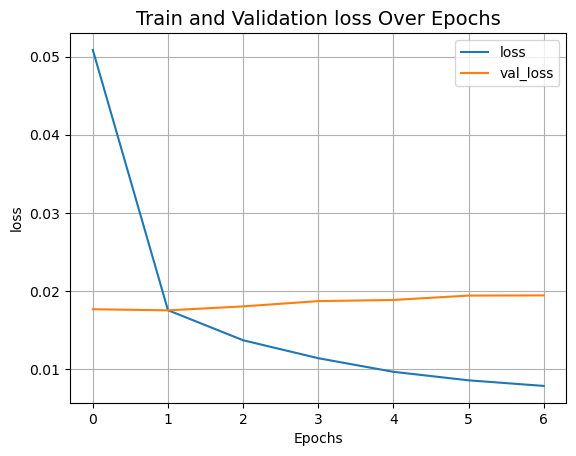

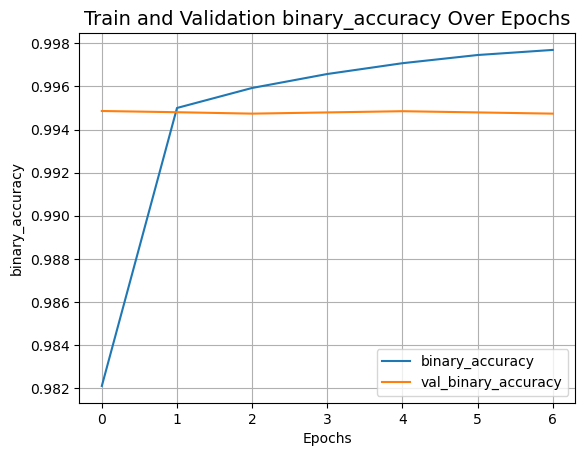

In [50]:
# plotting loss
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

# **Model Evaluation**

In [51]:
# model evaltuation on test and val dataset
_, binary_acc1 = model1.evaluate(test_dataset)
_, binary_acc2 = model1.evaluate(validation_dataset)

print(f"Categorical accuracy on the test set: {round(binary_acc1 * 100, 2)}%.")
print(f"Categorical accuracy on the validation set: {round(binary_acc2 * 100, 2)}%.")

16/16 [==============================] - 2s 119ms/step - loss: 0.0176 - binary_accuracy: 0.9948
Categorical accuracy on the test set: 99.46%.
Categorical accuracy on the validation set: 99.48%.


# **Save Model and Text Vectorizer:**

In [53]:
import pickle
# Save the model
model1.save("Models/model.h5")

# Save the configuration of the text vectorizer
saved_text_vectorizer_config = text_vectorizer.get_config()
with open("Models/text_vectorizer_config.pkl", "wb") as f:
    pickle.dump(saved_text_vectorizer_config, f)


# Save the vocabulary
with open("Models/vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

# **Load Model and Text Vectorizer:**

In [54]:
from tensorflow import keras
import pickle

# Load the model
loaded_model = keras.models.load_model("Models/model.h5")

from tensorflow.keras.layers import TextVectorization

# Load the configuration of the text vectorizer
with open("Models/text_vectorizer_config.pkl", "rb") as f:
    saved_text_vectorizer_config = pickle.load(f)



In [55]:

# Create a new TextVectorization layer with the saved configuration
loaded_text_vectorizer = TextVectorization.from_config(saved_text_vectorizer_config)

# Load the saved weights into the new TextVectorization layer
with open("Models/text_vectorizer_weights.pkl", "wb") as f:
    pickle.dump(loaded_text_vectorizer.get_weights(), f)

In [56]:

# Load the vocabulary
with open("Models/vocab.pkl", "rb") as f:
    loaded_vocab = pickle.load(f)

# **Model Prediction**

In [57]:
def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(loaded_vocab, hot_indices)

In [58]:
# Define the function to predict categories
def predict_category(abstract, model, vectorizer, label_lookup):
    # Preprocess the abstract using the loaded text vectorizer
    preprocessed_abstract = vectorizer([abstract])
    # Make predictions using the loaded model
    predictions = model.predict(preprocessed_abstract)
    # Post-process predictions
    predicted_labels = label_lookup(np.round(predictions).astype(int)[0])
    return predicted_labels

In [59]:
# Example usage
new_abstract = "Graph neural networks (GNNs) have been widely used to learn vector\nrepresentation of graph-structured data and achieved better task performance\nthan conventional methods. The foundation of GNNs is the message passing\nprocedure, which propagates the information in a node to its neighbors. Since\nthis procedure proceeds one step per layer, the range of the information\npropagation among nodes is small in the lower layers, and it expands toward the\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\nstructural information in a graph. On the other hand, it is known that deep GNN\nmodels suffer from performance degradation because they lose nodes' local\ninformation, which would be essential for good model performance, through many\nmessage passing steps. In this study, we propose multi-level attention pooling\n(MLAP) for graph-level classification tasks, which can adapt to both local and\nglobal structural information in a graph. It has an attention pooling layer for\neach message passing step and computes the final graph representation by\nunifying the layer-wise graph representations. The MLAP architecture allows\nmodels to utilize the structural information of graphs with multiple levels of\nlocalities because it preserves layer-wise information before losing them due\nto oversmoothing. Results of our experiments show that the MLAP architecture\nimproves the graph classification performance compared to the baseline\narchitectures. In addition, analyses on the layer-wise graph representations\nsuggest that aggregating information from multiple levels of localities indeed\nhas the potential to improve the discriminability of learned graph\nrepresentations."
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)

FailedPreconditionError: Exception encountered when calling layer 'string_lookup_2' (type StringLookup).

{{function_node __wrapped__LookupTableFindV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Table not initialized. [Op:LookupTableFindV2] name: 

Call arguments received by layer 'string_lookup_2' (type StringLookup):
  • inputs=<tf.RaggedTensor [[b'graph', b'neural', b'networks', b'gnns', b'have', b'been', b'widely',
  b'used', b'to', b'learn', b'vector', b'representation', b'of',
  b'graphstructured', b'data', b'and', b'achieved', b'better', b'task',
  b'performance', b'than', b'conventional', b'methods', b'the',
  b'foundation', b'of', b'gnns', b'is', b'the', b'message', b'passing',
  b'procedure', b'which', b'propagates', b'the', b'information', b'in',
  b'a', b'node', b'to', b'its', b'neighbors', b'since', b'this',
  b'procedure', b'proceeds', b'one', b'step', b'per', b'layer', b'the',
  b'range', b'of', b'the', b'information', b'propagation', b'among',
  b'nodes', b'is', b'small', b'in', b'the', b'lower', b'layers', b'and',
  b'it', b'expands', b'toward', b'the', b'higher', b'layers',
  b'therefore', b'a', b'gnn', b'model', b'has', b'to', b'be', b'deep',
  b'enough', b'to', b'capture', b'global', b'structural', b'information',
  b'in', b'a', b'graph', b'on', b'the', b'other', b'hand', b'it', b'is',
  b'known', b'that', b'deep', b'gnn', b'models', b'suffer', b'from',
  b'performance', b'degradation', b'because', b'they', b'lose', b'nodes',
  b'local', b'information', b'which', b'would', b'be', b'essential',
  b'for', b'good', b'model', b'performance', b'through', b'many',
  b'message', b'passing', b'steps', b'in', b'this', b'study', b'we',
  b'propose', b'multilevel', b'attention', b'pooling', b'mlap', b'for',
  b'graphlevel', b'classification', b'tasks', b'which', b'can', b'adapt',
  b'to', b'both', b'local', b'and', b'global', b'structural',
  b'information', b'in', b'a', b'graph', b'it', b'has', b'an',
  b'attention', b'pooling', b'layer', b'for', b'each', b'message',
  b'passing', b'step', b'and', b'computes', b'the', b'final', b'graph',
  b'representation', b'by', b'unifying', b'the', b'layerwise', b'graph',
  b'representations', b'the', b'mlap', b'architecture', b'allows',
  b'models', b'to', b'utilize', b'the', b'structural', b'information',
  b'of', b'graphs', b'with', b'multiple', b'levels', b'of', b'localities',
  b'because', b'it', b'preserves', b'layerwise', b'information',
  b'before', b'losing', b'them', b'due', b'to', b'oversmoothing',
  b'results', b'of', b'our', b'experiments', b'show', b'that', b'the',
  b'mlap', b'architecture', b'improves', b'the', b'graph',
  b'classification', b'performance', b'compared', b'to', b'the',
  b'baseline', b'architectures', b'in', b'addition', b'analyses', b'on',
  b'the', b'layerwise', b'graph', b'representations', b'suggest', b'that',
  b'aggregating', b'information', b'from', b'multiple', b'levels', b'of',
  b'localities', b'indeed', b'has', b'the', b'potential', b'to',
  b'improve', b'the', b'discriminability', b'of', b'learned', b'graph',
  b'representations', b'graph neural', b'neural networks',
  b'networks gnns', b'gnns have', b'have been', b'been widely',
  b'widely used', b'used to', b'to learn', b'learn vector',
  b'vector representation', b'representation of', b'of graphstructured',
  b'graphstructured data', b'data and', b'and achieved',
  b'achieved better', b'better task', b'task performance',
  b'performance than', b'than conventional', b'conventional methods',
  b'methods the', b'the foundation', b'foundation of', b'of gnns',
  b'gnns is', b'is the', b'the message', b'message passing',
  b'passing procedure', b'procedure which', b'which propagates',
  b'propagates the', b'the information', b'information in', b'in a',
  b'a node', b'node to', b'to its', b'its neighbors', b'neighbors since',
  b'since this', b'this procedure', b'procedure proceeds',
  b'proceeds one', b'one step', b'step per', b'per layer', b'layer the',
  b'the range', b'range of', b'of the', b'the information',
  b'information propagation', b'propagation among', b'among nodes',
  b'nodes is', b'is small', b'small in', b'in the', b'the lower',
  b'lower layers', b'layers and', b'and it', b'it expands',
  b'expands toward', b'toward the', b'the higher', b'higher layers',
  b'layers therefore', b'therefore a', b'a gnn', b'gnn model',
  b'model has', b'has to', b'to be', b'be deep', b'deep enough',
  b'enough to', b'to capture', b'capture global', b'global structural',
  b'structural information', b'information in', b'in a', b'a graph',
  b'graph on', b'on the', b'the other', b'other hand', b'hand it',
  b'it is', b'is known', b'known that', b'that deep', b'deep gnn',
  b'gnn models', b'models suffer', b'suffer from', b'from performance',
  b'performance degradation', b'degradation because', b'because they',
  b'they lose', b'lose nodes', b'nodes local', b'local information',
  b'information which', b'which would', b'would be', b'be essential',
  b'essential for', b'for good', b'good model', b'model performance',
  b'performance through', b'through many', b'many message',
  b'message passing', b'passing steps', b'steps in', b'in this',
  b'this study', b'study we', b'we propose', b'propose multilevel',
  b'multilevel attention', b'attention pooling', b'pooling mlap',
  b'mlap for', b'for graphlevel', b'graphlevel classification',
  b'classification tasks', b'tasks which', b'which can', b'can adapt',
  b'adapt to', b'to both', b'both local', b'local and', b'and global',
  b'global structural', b'structural information', b'information in',
  b'in a', b'a graph', b'graph it', b'it has', b'has an', b'an attention',
  b'attention pooling', b'pooling layer', b'layer for', b'for each',
  b'each message', b'message passing', b'passing step', b'step and',
  b'and computes', b'computes the', b'the final', b'final graph',
  b'graph representation', b'representation by', b'by unifying',
  b'unifying the', b'the layerwise', b'layerwise graph',
  b'graph representations', b'representations the', b'the mlap',
  b'mlap architecture', b'architecture allows', b'allows models',
  b'models to', b'to utilize', b'utilize the', b'the structural',
  b'structural information', b'information of', b'of graphs',
  b'graphs with', b'with multiple', b'multiple levels', b'levels of',
  b'of localities', b'localities because', b'because it', b'it preserves',
  b'preserves layerwise', b'layerwise information', b'information before',
  b'before losing', b'losing them', b'them due', b'due to',
  b'to oversmoothing', b'oversmoothing results', b'results of', b'of our',
  b'our experiments', b'experiments show', b'show that', b'that the',
  b'the mlap', b'mlap architecture', b'architecture improves',
  b'improves the', b'the graph', b'graph classification',
  b'classification performance', b'performance compared', b'compared to',
  b'to the', b'the baseline', b'baseline architectures',
  b'architectures in', b'in addition', b'addition analyses',
  b'analyses on', b'on the', b'the layerwise', b'layerwise graph',
  b'graph representations', b'representations suggest', b'suggest that',
  b'that aggregating', b'aggregating information', b'information from',
  b'from multiple', b'multiple levels', b'levels of', b'of localities',
  b'localities indeed', b'indeed has', b'has the', b'the potential',
  b'potential to', b'to improve', b'improve the', b'the discriminability',
  b'discriminability of', b'of learned', b'learned graph',
  b'graph representations']]>

In [60]:
arxiv_data['abstracts'][0]

"Graph neural networks (GNNs) have been widely used to learn vector\r\nrepresentation of graph-structured data and achieved better task performance\r\nthan conventional methods. The foundation of GNNs is the message passing\r\nprocedure, which propagates the information in a node to its neighbors. Since\r\nthis procedure proceeds one step per layer, the range of the information\r\npropagation among nodes is small in the lower layers, and it expands toward the\r\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\r\nstructural information in a graph. On the other hand, it is known that deep GNN\r\nmodels suffer from performance degradation because they lose nodes' local\r\ninformation, which would be essential for good model performance, through many\r\nmessage passing steps. In this study, we propose multi-level attention pooling\r\n(MLAP) for graph-level classification tasks, which can adapt to both local and\r\nglobal structural information in a graph. It h

# ** =======Section 2========**

# **Recommendation System**

In [5]:
arxiv_data.drop(columns = ["terms","abstracts"], inplace = True)

In [6]:
arxiv_data

,titles
0,Multi-Level Attention Pooling for Graph Neural...
1,Decision Forests vs. Deep Networks: Conceptual...
2,Power up! Robust Graph Convolutional Network v...
3,Releasing Graph Neural Networks with Different...
4,Recurrence-Aware Long-Term Cognitive Network f...
...,...
56176,Mining Spatio-temporal Data on Industrializati...
56177,Wav2Letter: an End-to-End ConvNet-based Speech...
56178,Deep Reinforcement Learning with Double Q-lear...
56179,Generalized Low Rank Models


# **Sentence Transformers**

In [7]:
from sentence_transformers import SentenceTransformer,util

C:\Users\ASUS\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [8]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [9]:
sentences = arxiv_data['titles']

In [10]:
embeddings = model.encode(sentences)

In [11]:
embeddings

array([[ 0.06643412, -0.04954597,  0.06388088, ...,  0.00106303,
        -0.1215638 , -0.06962783],
       [ 0.09212257, -0.07606944,  0.06572863, ..., -0.08565164,
        -0.09266546,  0.00725291],
       [-0.08162688,  0.02428937,  0.01888741, ...,  0.00806161,
        -0.05129534, -0.05874001],
       ...,
       [-0.09695333,  0.00057092,  0.07726484, ..., -0.01443817,
        -0.04748217,  0.06130559],
       [ 0.00768869, -0.10124185,  0.08909854, ..., -0.08199864,
        -0.05649742,  0.09007055],
       [ 0.06078521, -0.08312804, -0.00907777, ..., -0.0314818 ,
         0.05713108,  0.05696886]], dtype=float32)

In [12]:
embeddings.shape

(56181, 384)

# **Print the embeddings**

In [13]:
c=0

for sentence,embedding in zip(sentences,embeddings):
    print("Sentence:", sentence)
    print("Embedding length:", len(embedding)) # list of floats
    print("")
    if c>=5:
        break
    c+=1

Sentence: Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities
Embedding length: 384

Sentence: Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes
Embedding length: 384

Sentence: Power up! Robust Graph Convolutional Network via Graph Powering
Embedding length: 384

Sentence: Releasing Graph Neural Networks with Differential Privacy Guarantees
Embedding length: 384

Sentence: Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
Embedding length: 384

Sentence: Lifelong Graph Learning
Embedding length: 384



# **Save files**

In [14]:
import pickle

with open("Models/embeddings.pkl",'wb') as f:
    pickle.dump(embeddings,f)
    
with open('Models/sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)
    
with open('Models/rec_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# **Recommendation for similar papers**

In [15]:
# load save files
embeddings = pickle.load(open('Models/embeddings.pkl','rb'))
sentences = pickle.load(open('Models/sentences.pkl','rb'))
rec_model = pickle.load(open('Models/rec_model.pkl','rb'))

In [16]:
import torch

def recommendation(input_paper):
    # Calculate cosine similarity scores between the embeddings of input_paper and all papers in the dataset.
    cosine_scores = util.cos_sim(embeddings, rec_model.encode(input_paper))
    
    # Get the indices of the top-k most similar papers based on cosine similarity.
    top_similar_papers = torch.topk(cosine_scores, dim=0, k=5, sorted=True)
                                 
    # Retrieve the titles of the top similar papers.
    papers_list = []
    for i in top_similar_papers.indices:
        papers_list.append(sentences[i.item()])
    
    return papers_list
    

In [17]:
# exampel usage 1: (use this paper as input (BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding))
# exampel usage 2: (use this paper as input (Review of deep learning: concepts, CNN architectures, challenges, applications, future directions))

input_paper = input("Enter the title of any paper you like ")

recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you like attention is all you need
We recommend to read this paper............
Attention that does not Explain Away
Attention that does not Explain Away
Attention that does not Explain Away
Area Attention
Area Attention
